# A-Data Collection and Preparation

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set

In [2]:
df=pd.read_csv('anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## Data Preparation

 #### 1- Handling missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [4]:
df.shape

(1421, 6)

In [5]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

#### 2- Handling Imbalanced values

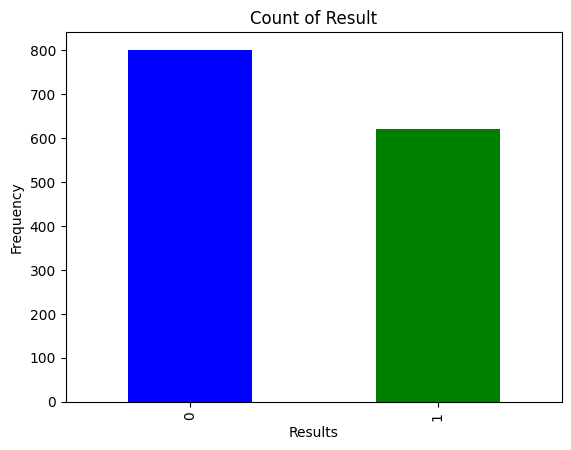

In [6]:
# 0 for not Anemia and 1 for Anemia
# checking for the count of anemia and not anemia
results = df['Result'].value_counts()
results.plot(kind = 'bar',color=['blue','green'])
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [7]:
# female count is observed to be more than male so we balance it using undesampling
from sklearn.utils import resample
majorclass = df[df['Result'] == 0]
minorclass = df[df['Result'] == 1]
major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass),random_state=42)
df = pd.concat([major_downsample,minorclass])
df['Result'].value_counts()

Result
0    620
1    620
Name: count, dtype: int64

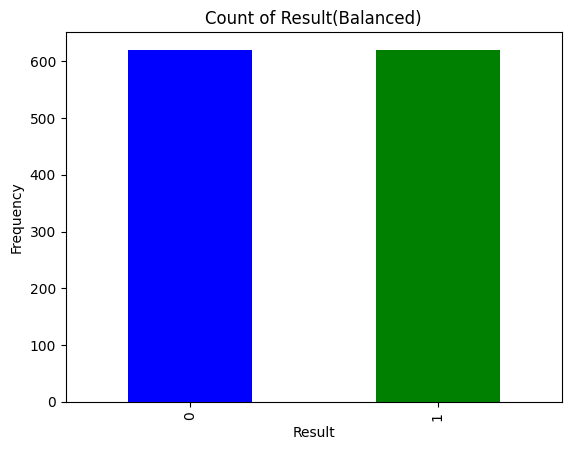

In [8]:
# Plotting the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind = 'bar', color = ['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result(Balanced)')
plt.show()

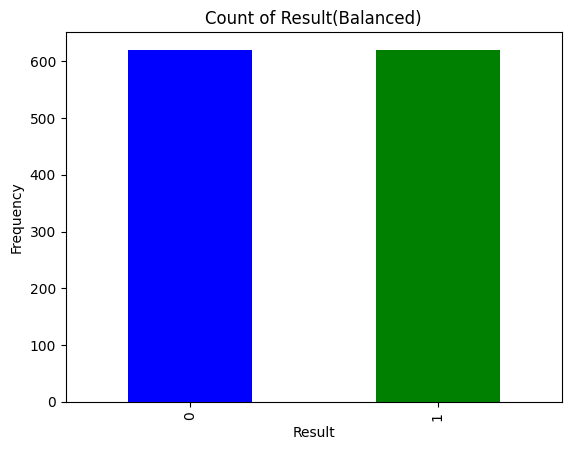

In [9]:
# Plotting the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind = 'bar', color = ['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result(Balanced)')
plt.show()

# B- Exploratory Data Analysis

#### Descriptive statistical

In [10]:
df.describe

<bound method NDFrame.describe of       Gender  Hemoglobin   MCH  MCHC   MCV  Result
1234       1        16.6  18.8  28.1  70.9       0
1188       0        15.3  18.3  30.4  93.4       0
106        0        14.8  20.4  28.5  91.1       0
954        0        14.6  16.9  31.9  78.1       0
112        0        15.9  28.7  31.0  81.6       0
...      ...         ...   ...   ...   ...     ...
1415       1        13.2  20.1  28.8  91.2       1
1416       0        10.6  25.4  28.2  82.9       1
1417       1        12.1  28.3  30.4  86.9       1
1418       1        13.1  17.7  28.1  80.7       1
1420       0        11.8  21.2  28.4  98.1       1

[1240 rows x 6 columns]>

#### Visual Analysis

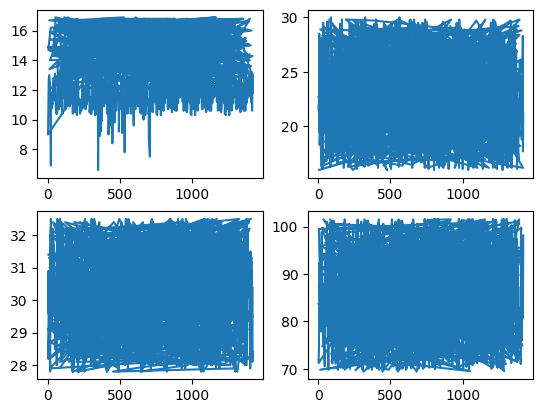

In [11]:
#Visual analysis 

fig,axis=plt.subplots(2,2)
axis[0,0].plot(df['Hemoglobin'])
axis[0,1].plot(df['MCH'])
axis[1,0].plot(df['MCHC'])
axis[1,1].plot(df['MCV'])

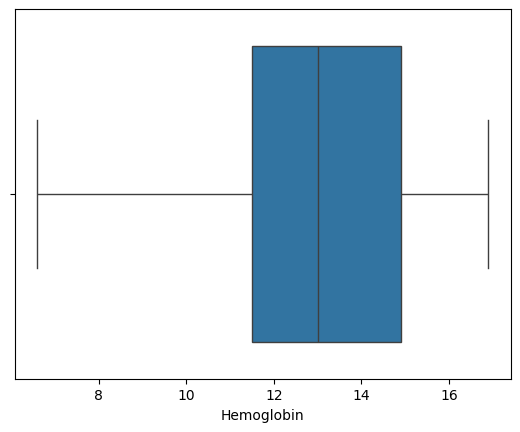

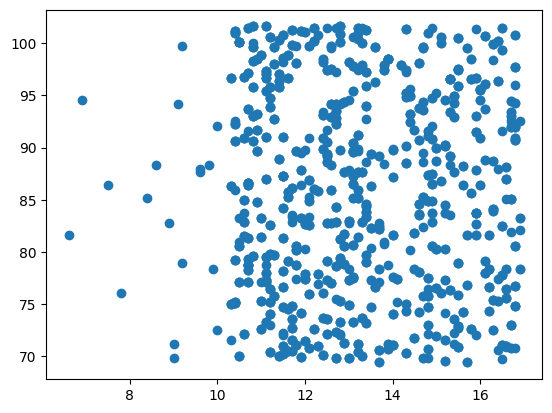

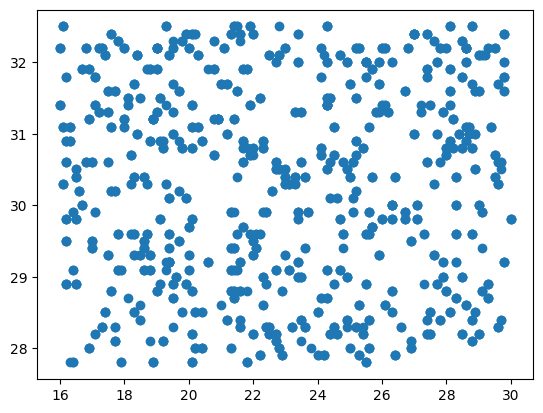

In [12]:
#identifying outliers
sns.boxplot(df['Hemoglobin'], orient='h')
plt.show()

plt.scatter(df['Hemoglobin'],df['MCV'])
plt.show()

plt.scatter(df['MCH'],df['MCHC'])

#### Univariate Analysis

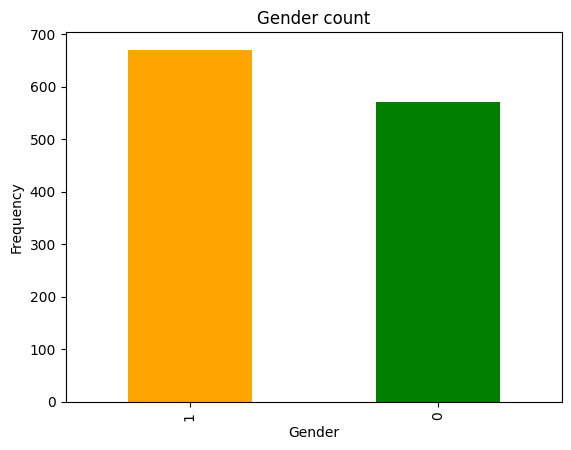

In [13]:
#Univariate Analysis: Bar graph 

output=df['Gender'].value_counts()
output.plot(kind='bar',color=['orange','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender count')
plt.show()

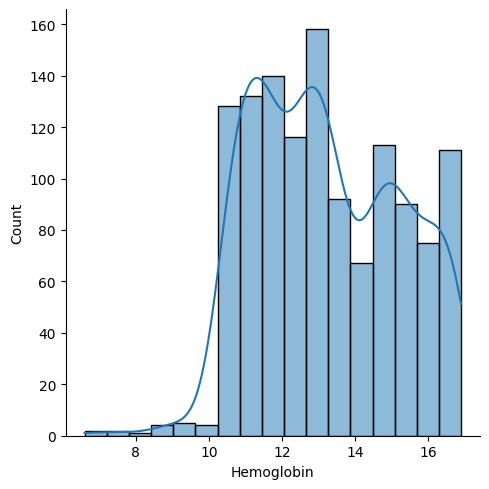

In [14]:
#Univariate analysis: displot

# Hemoglobin

sns.displot(df['Hemoglobin'],kde=True)

#### Bivariate Analysis

C:\Users\vinay\AppData\Local\Temp\ipykernel_9000\1819879782.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y = df['Hemoglobin'], x = df['Gender'], hue = df['Result'], ci = None)


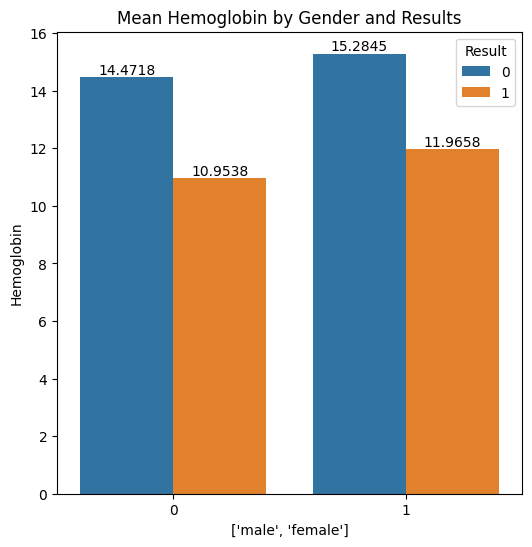

In [15]:
plt.figure(figsize = (6,6))
ax = sns.barplot(y = df['Hemoglobin'], x = df['Gender'], hue = df['Result'], ci = None)
ax.set(xlabel = ['male','female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Hemoglobin by Gender and Results")
plt.show()

#### Multivariate Analysis

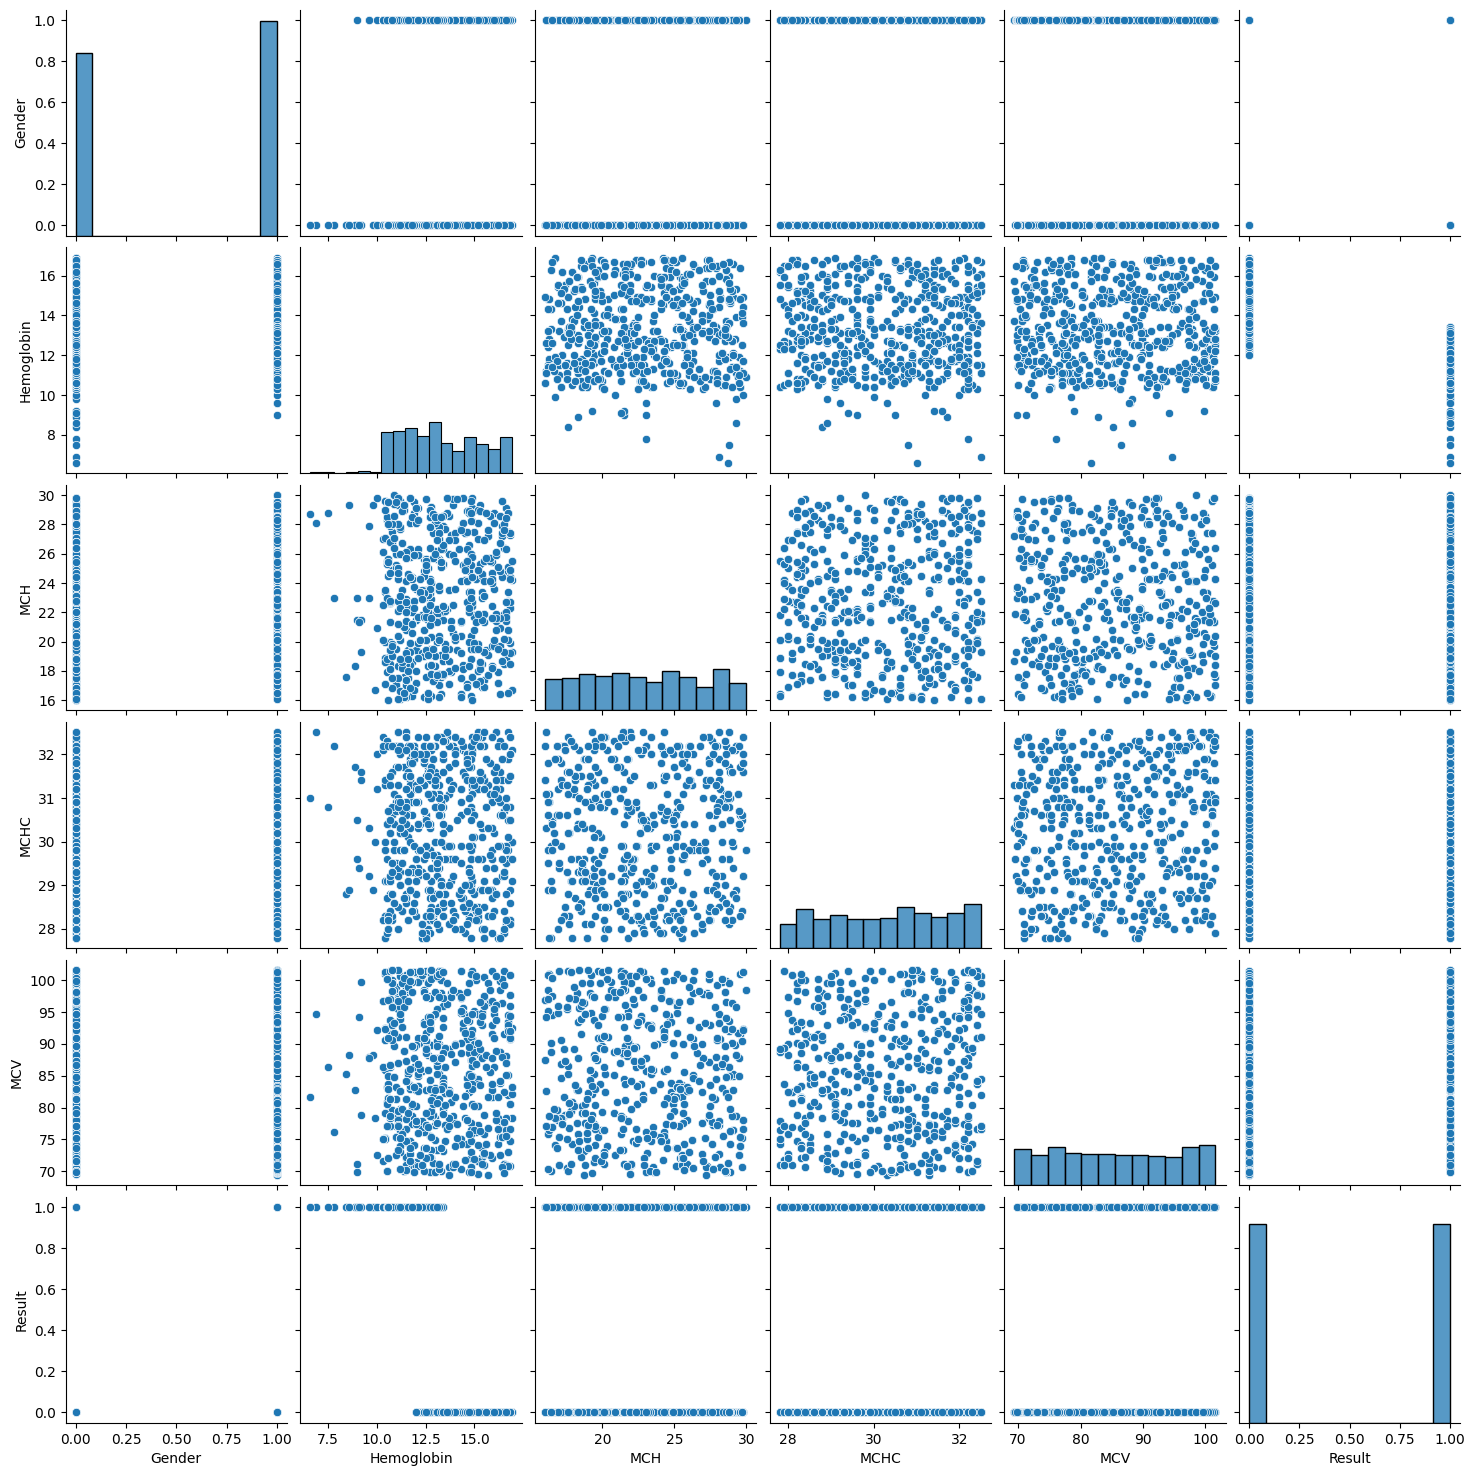

In [16]:
sns.pairplot(df)

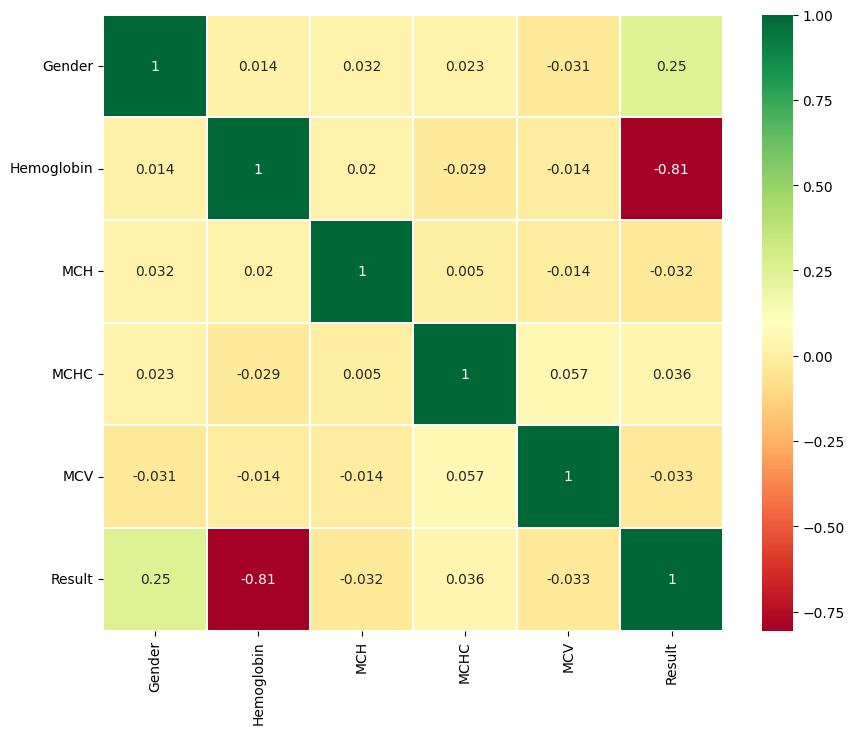

In [17]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Splitting Data Into Train And Test

In [18]:
# x - independent variables

x=df.drop('Result',axis=1)
x

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [19]:
# y - dependent variables

y=df['Result']
y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


# C- Model Building

## Training the model in multiple algorithms

#### 1-Logistic Regression Model 

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_lr)
print(c_lr)

Accuracy Score:  0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



#### 2-Random forest model

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



#### 3-Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_dt)
print(c_dt)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



#### 4-Gaussian Navies Bayes 

In [26]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



#### 5-Support Vector Machine

In [27]:
from sklearn.svm import SVC

support_vector = SVC()
support_vector.fit(x_train, y_train)
y_pred = support_vector.predict(x_test)

acc_svc = accuracy_score(y_test,y_pred)
c_svc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_svc)
print(c_svc)

Accuracy Score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



#### 6-Gradient Boosting Classifier 

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)

acc_gbc = accuracy_score(y_test,y_pred)
c_gbc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_gbc)
print(c_gbc)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



## Testing the model


In [29]:
prediction = GBC.predict([[0,11.6,22.3,30.9,74.5]])

C:\Users\vinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [30]:
prediction[0]

np.int64(1)

In [31]:
if prediction[0] == 1:
    print("You don't have any Anemia Disease")
elif prediction[0] == 1:
    print("You have Anemia Disease")

You don't have any Anemia Disease
